**Archie Manalo**

**BSCS 4B**

**CSST 106**

**Machine Problem 2**

In [1]:
!pip install opencv-python-headless

**2. Import Necessary Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Function to display an image using matplotlib def display_image(img, title="Image"):
def display_image(img, title="Image"):
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
 plt.title(title)
 plt.axis('off')
 plt.show()
# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
 plt.subplot(1, 2, 1)
 plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
 plt.title(title1)
 plt.axis('off')
 plt.subplot(1, 2, 2)
 plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
 plt.title(title2)
 plt.axis('off')
 plt.show()

**3. Load an Image**

Saving kuto.jpg to kuto (1).jpg


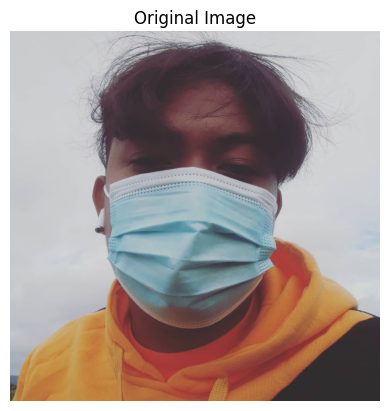

In [3]:
from google.colab import files
from io import BytesIO
from PIL import Image
# Upload an image
uploaded = files.upload()
# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

**EXERCISE 1: Scaling & Rotation**

In [4]:
# Scaling
def scale_image(img, scale_factor):
 height, width = img.shape[:2]
 scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
 return scaled_img

In [5]:
# Rotate
def rotate_image(img, angle):
 height, width = img.shape[:2]
 center = (width // 2, height // 2)
 matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
 rotated_img = cv2.warpAffine(img, matrix, (width, height))
 return rotated_img

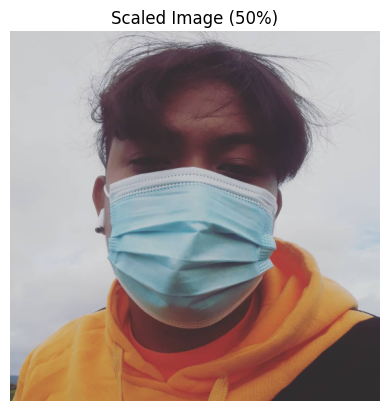

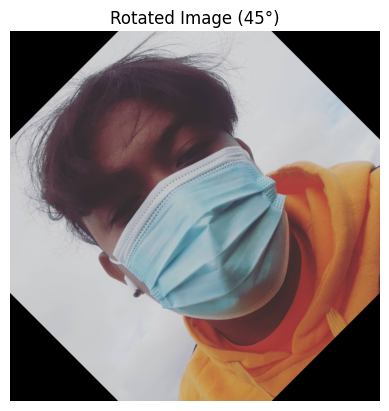

In [6]:
# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

**EXERCISE 2: Blurring Techniques**

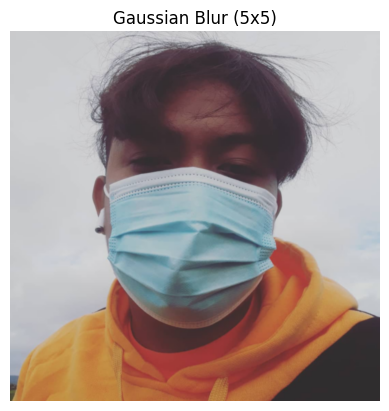

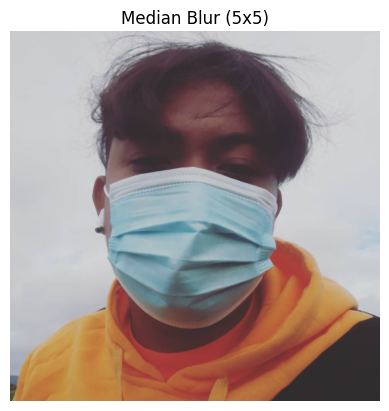

In [7]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")
"""
cv2.GaussianBlur(): Applies a Gaussian blur to the image, which smooths it by averaging
the pixel values in a 5x5 kernel (a small matrix). This is useful for reducing noise in an image. """
# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

**EXERCISE 3: Edge Detection using Canny**

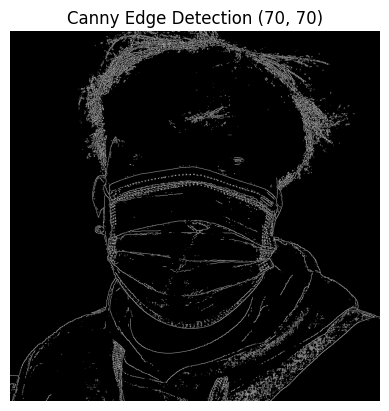

In [8]:
# Canny Edge Detection
edge = cv2.Canny(image, 70, 70)
display_image(edge, "Canny Edge Detection (70, 70)")

**EXERCISE 4: Basic Image Processor (Interactive)**

In [9]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


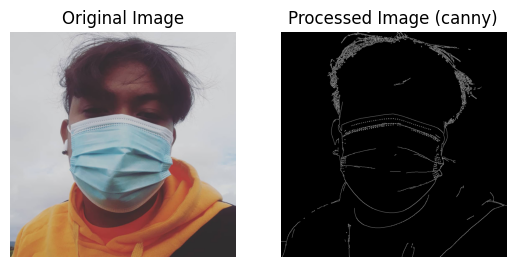

In [10]:
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

**EXERCISE 5: Comparison of Filtering Techniques**

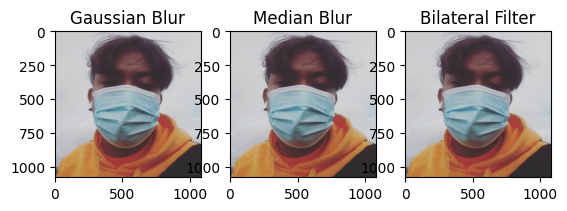

In [11]:
# Applying Gaussian, Median, and Bilateral filters gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0) median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike Gaussian or median filters. It’s useful for reducing noise while preserving details. """
# Display the results for comparison plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

**EXERCISE 6: Sobel Edge Detection**

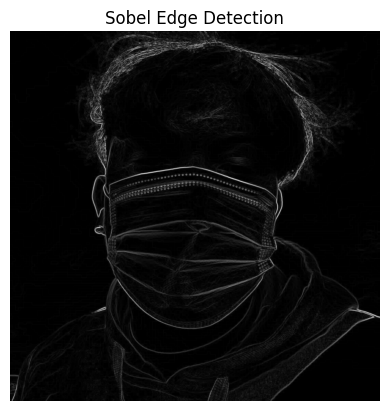

In [12]:
# Sobel Edge Detection
def sobel_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
  # Sobel edge detection in the y direction
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
  # Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)
  return sobel_combined
# Apply Sobel edge detection to the uploaded
image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

**EXERCISE 7: Laplacian Edge Detection**

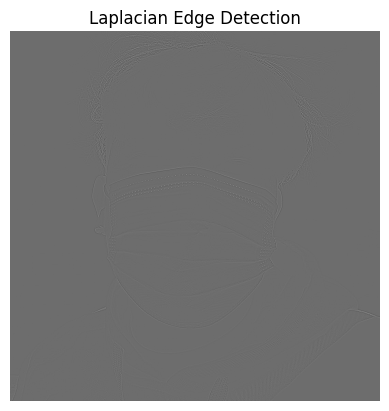

In [13]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian
# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

**EXERCISE 8: Prewitt Edge Detection**

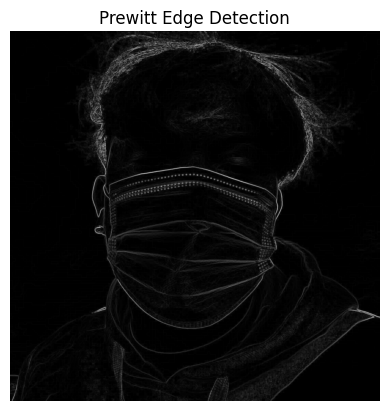

In [14]:
def prewitt_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Prewitt operator kernels for x and y directions
  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
  # Applying the Prewitt operator
  prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
  prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
# Combine the x and y gradients by converting to floating point
  prewitt_combined = cv2.magnitude(prewittx, prewitty)
  return prewitt_combined
# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

**EXERCISE 9: Bilateral Filter**

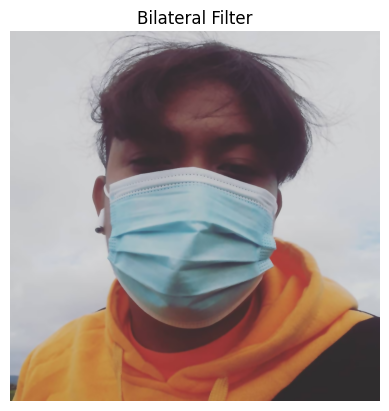

In [15]:
# Bilateral Filter
def bilateral_blur(img):
  bilateral = cv2.bilateralFilter(img, 9, 75, 75)
  return bilateral
# Apply Bilateral filter to the uploaded
bilateral_blurred = bilateral_blur(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

**EXERCISE 10: Box Filter**

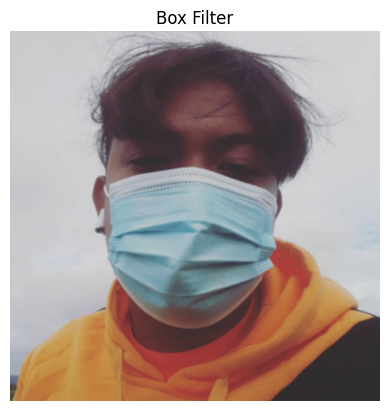

In [16]:
# Box Filter
def box_blur(img):
  box = cv2.boxFilter(img, -1, (5, 5))
  return box
# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

**EXERCISE 11: Motion Blur**

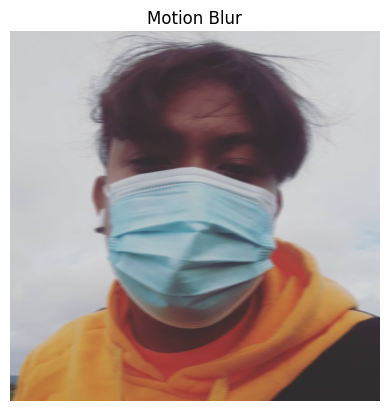

In [17]:
# Motion Blur
def motion_blur(img):
# Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
  # Apply motion blur
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred
# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

**EXERCISE 12: Unsharp making Sharpening**

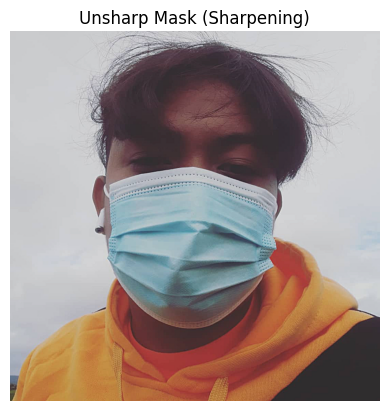

In [18]:
def unsharp_mask(img):
# Create a Gaussian blur version of the image
  blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
  # Sharpen by adding the difference between the original and the blurred image
  sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
  return sharpened
# Apply Unsharp Masking to the uploaded i
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

**EXERCISE 13: Compile the Techniques**

In [19]:
# Update process_image function to include new blurring techniques def process_image(img, action):
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  elif action == 'sobel':
    return sobel_edge_detection(img)
  elif action == 'laplacian':
    return laplacian_edge_detection(img)
  elif action == 'prewitt':
    return prewitt_edge_detection(img)
  elif action == 'bilateral_blur':
    return bilateral_blur(img)
  elif action == 'box_blur':
    return box_blur(img)
  elif action == 'motion_blur':
    return motion_blur(img)
  elif action == 'unsharp_mask':
    return unsharp_mask(img)
  else:
    return img

**EXERCISE 14: Add new blurring techniques for the interactive processing**

In [21]:
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_b")
processed_image = process_image(image, action)
def display_images(img1, img2, title1, title2):
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  # Convert img2 to uint8 before displaying
  img2 = cv2.convertScaleAbs(img2) #This scales, calculates absolute values, and converts to uint8
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')
  plt.show()

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_bsobel


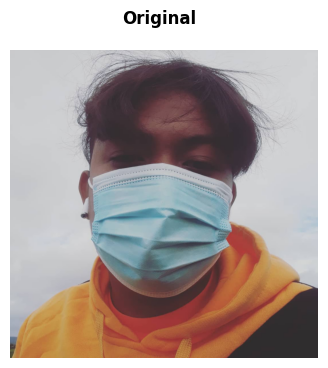

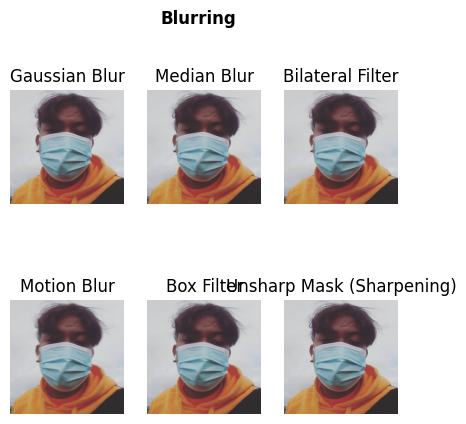

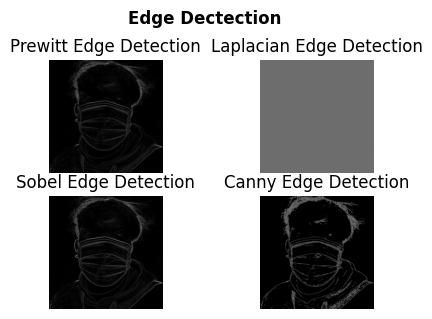

In [22]:
plt.figure(figsize=(4,4))
plt.suptitle("Original", fontweight='bold')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.suptitle("Blurring", fontweight='bold')
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')


plt.figure(figsize=(5, 5))
plt.suptitle("Edge Dectection", fontweight='bold')
plt.subplot(3, 2, 1)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(edge, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()